In [2]:
!python --version
#!pip install pandas-datareader
#!pip install yfinance
!pip install matplotlib

Python 3.9.5
     |████████████████████████████████| 10.3 MB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 4.5 MB/s eta 0:00:01


### Let's load the ticker data for 5 differet market segments and NIFTY50
- Banking
- Realty
- IT
- Pharma
- FMCG

In [11]:
!python3 -m pip install pandas_datareader

In [1]:
a = [1,2,3,4,5]
print(a[0])

1


In [3]:

from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
import os
import pandas as pd
import glob
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import numpy as np

In [4]:



yf.pdr_override()
import pandas as pd
# Tickers list
# We can add and delete any ticker from the list to get desired ticker live data
#ticker_list=['ONGC.NS','COALINDIA.NS','GRASIM.NS','DIVISLAB.NS','IOC.NS','SUNPHARMA.NS','DRREDDY.NS','BPCL.NS','WIPRO.NS','CIPLA.NS','SBILIFE.NS','POWERGRID.NS','BAJAJ-AUTO.NS','TATACONSUM.NS','INDUSINDBK.NS','TATASTEEL.NS','INFY.NS','NTPC.NS','BAJFINANCE.NS','BRITANNIA.NS','ITC.NS','BHARTIARTL.NS','HCLTECH.NS','AXISBANK.NS','NESTLEIND.NS','TITAN.NS','LT.NS','RELIANCE.NS','BAJAJFINSV.NS','HEROMOTOCO.NS','UPL.NS','HDFCLIFE.NS','EICHERMOT.NS','JSWSTEEL.NS','TECHM.NS','SHREECEM.NS','MARUTI.NS','SBIN.NS','ULTRACEMCO.NS','HINDALCO.NS','HINDUNILVR.NS','TCS.NS','ADANIPORTS.NS','M&M.NS','TATAMOTORS.NS','ASIANPAINT.NS','KOTAKBANK.NS','ICICIBANK.NS','HDFCBANK.NS','HDFC.NS']
ticker_list = ['^NSEBANK','^CNXREALTY','^CNXIT','^CNXPHARMA','^CNXFMCG','^NSEI']
today = date.today()
# We can get data by our choice by giving days bracket
start_date= '2019–10–01'
end_date="2021–05-02"
files=[]
outdir = './ticker_data'
covid_outdir = './covid_case_data'
if not os.path.exists(outdir):
    os.mkdir(outdir)
if not os.path.exists(covid_outdir):
    os.mkdir(covid_outdir)
    
def get_historic_dates(start_n_days,end_n_days):
    for n in range(start_n_days,end_n_days):
        yield today  + timedelta(days=-n)

def read_n_files(n,from_dir):
    all_files = glob.glob(from_dir + "/*.csv")
    ll = []
    if(len(all_files) > n):
        print('More files') 
        for i in range(0,n):
           
            df = pd.read_csv(all_files[i], index_col=None, header=0)
            ll.append(df)
    else:
        print('Less files')
        for filename in all_files:
            
            df = pd.read_csv(filename, index_col=None, header=0)
            ll.append(df)
    df1 = pd.concat(ll, axis=0, ignore_index=True)
    print(df1.head())
    
    return df1
    
#read_n_files(7,outdir)

In [5]:
str

str

In [6]:
from datetime import date, timedelta

def getData(ticker):
    print(ticker)
    data = pdr.get_data_yahoo(ticker, start=(today + timedelta(days=-600)), end=today + timedelta(days=-1))

    dataname = ticker +'_'+str(today)
    files.append(dataname)
    SaveData(data,outdir, dataname)


# Create a data folder in your current dir.
def SaveData(df,writedir, filename):
    df.to_csv(writedir+'/'+filename +'.csv',index=False)



In [7]:
# This loop will iterate over ticker list, will pass one ticker to get data, and save that data as file.
for tik in ticker_list:
    getData(tik)

^NSEBANK
[*********************100%***********************]  1 of 1 completed
^CNXREALTY
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ^CNXREALTY: No data found for this date range, symbol may be delisted
^CNXIT
[*********************100%***********************]  1 of 1 completed
^CNXPHARMA
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ^CNXPHARMA: No data found for this date range, symbol may be delisted
^CNXFMCG
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ^CNXFMCG: No data found for this date range, symbol may be delisted
^NSEI
[*********************100%***********************]  1 of 1 completed


### Let's now load the covid cases data for India

In [9]:
header =  ['FIPS','Admin2','Province_State','Country_Region','Last_Update','Lat','Long_','Confirmed','Deaths','Recovered','Active','Combined_Key']

filen = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-21-2020.csv'

df = pd.read_csv(filen)

#df.col
df.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-21T10:13:08,67800,3139,58946,30.9756,112.2707
1,NaN,Italy,2020-03-21T17:43:03,53578,4825,6072,41.8719,12.5674
2,NaN,Spain,2020-03-21T13:13:30,25374,1375,2125,40.4637,-3.7492
3,NaN,Germany,2020-03-21T20:43:02,22213,84,233,51.1657,10.4515
4,NaN,Iran,2020-03-21T11:13:12,20610,1556,7635,32.4279,53.6880


In [10]:
from datetime import timedelta,date
today = date.today()



import pandas as pd

ll = []
jl = set()

for d in get_historic_dates(2,470):
    str1 = d.strftime('%m-%d-%Y')
    print(str1)
    filename = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+str1+'.csv'
    print(filename)
    df = pd.read_csv(filename)
    ll.append(df)
        
    jl.update(set(df.columns))
    #df = pd.read_csv(filename,header=[1])
    cols = df.columns
    print(cols)
    if 'Country_Region' in cols:
        print('In country_regions')
        f = df[df['Country_Region']=='India']
    else:
        print('In country/regions')
        f = df[df['Country/Region']=='India']
        f['Country_Region'] = f['Country/Region']
        f.drop(['Country/Region'],inplace=True,axis=1)
    
    if 'Case-Fatality_Ratio' in cols:
        f['Case_Fatality_Ratio'] = f['Case-Fatality_Ratio']
        f.drop(['Case-Fatality_Ratio'],inplace=True,axis=1)
    
    if 'Incidence_Rate' in cols:
        f['Incident_Rate'] = f['Incidence_Rate']
        f.drop(['Incidence_Rate'],inplace=True,axis=1)
    
    if ( ('Incident_Rate' not in cols) and ('Incidence_Rate' not in cols)) :
        f['Incident_Rate'] = 0
        
    if (('Case-Fatality_Ratio' not in cols) and ('Case_Fatality_Ratio' not in cols)) :
        f['Case_Fatality_Ratio'] = 0
        
    f = f[['Country_Region','Incident_Rate','Case_Fatality_Ratio','Deaths','Recovered', 'Confirmed']]
        
    f['record_date'] = d
    SaveData(f,covid_outdir,str1)

    
print(jl)    

07-08-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-08-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
07-07-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-07-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
07-06-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-06-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'La

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
06-16-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-16-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
06-15-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-15-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='ob

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
05-25-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-25-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
05-24-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-24-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='ob

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
05-03-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-03-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
05-02-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-02-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='ob

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
04-11-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-11-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
04-10-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-10-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='ob

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
03-20-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-20-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
03-19-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-19-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='ob

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
02-26-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/02-26-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
02-25-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/02-25-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='ob

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
02-04-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/02-04-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
02-03-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/02-03-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='ob

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
01-13-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-13-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
01-12-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-12-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='ob

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
12-22-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/12-22-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
12-21-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/12-21-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='ob

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
11-30-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/11-30-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
11-29-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/11-29-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='ob

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
11-08-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/11-08-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
11-07-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/11-07-2020.csv


/home/amit/anaconda3/envs/thesis/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/home/amit/anaconda3/envs/thesis/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
11-06-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/11-06-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
11-05-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/11-05-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype=

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
10-15-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/10-15-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
10-14-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/10-14-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype=

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
09-23-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/09-23-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
09-22-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/09-22-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype=

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
09-01-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/09-01-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
08-31-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/08-31-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype=

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
08-10-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/08-10-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
08-09-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/08-09-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype=

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
07-19-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-19-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
07-18-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-18-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype=

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
06-27-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-27-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
06-26-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-26-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype=

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
06-05-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-05-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
06-04-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-04-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype=

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key'],
      dtype='object')
In country_regions
05-13-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-13-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key'],
      dtype='object')
In country_regions
05-12-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-12-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key'],
      dtype='object')
In country_regions
05-11-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key'],
      dtype='object')
In country_regions
04-19-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-19-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key'],
      dtype='object')
In country_regions
04-18-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-18-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key'],
      dtype='object')
In country_regions
04-17-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data

In [9]:
df = pd.read_csv('./ticker_data/^NSEBANK_2021-05-09.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-17,27765.099609,27851.400391,27047.949219,27131.750000,27131.750000,0
1,2019-09-18,27304.699219,27414.449219,27088.800781,27172.650391,27172.650391,0
2,2019-09-19,27175.449219,27175.449219,26643.000000,26757.650391,26757.650391,0
3,2019-09-20,26878.650391,29418.949219,26727.550781,28981.550781,28981.550781,0
4,2019-09-23,30039.400391,30801.300781,29776.300781,30566.199219,30566.199219,0


Text(0.5, 1.0, 'NIFTY50 Autocorrelation plot with lag= 3')

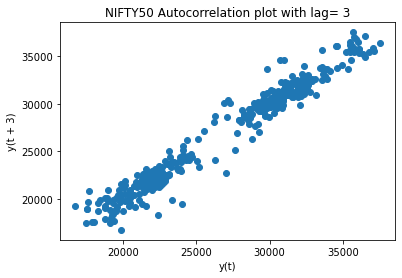

In [10]:
plt.figure()
lag_plot(df['Open'],lag=3)
plt.title('NIFTY50 Autocorrelation plot with lag= 3')

In [11]:
len(df['Close'])

403

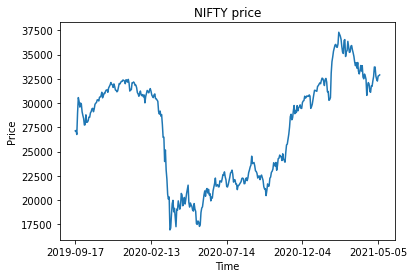

In [22]:
plt.plot(df['Date'],df['Close'])
plt.xticks(np.arange(0,500,100),df['Date'][0:500:100])
plt.title('NIFTY price')
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

In [21]:
covid_df = read_n_files(500,covid_outdir)
covid_df.head()

Less files
   Unnamed: 0 Country_Region  Incident_Rate Case_Fatality_Ratio  Deaths  \
0         247          India    1185.748952             1.25379    62.0   
1         248          India    1636.791213            0.805634  7108.0   
2         249          India    1064.593896            0.334948    56.0   
3         250          India     607.214208            0.483324  1045.0   
4         251          India     201.717267            0.554931  1397.0   

   Recovered  Confirmed record_date  
0     4826.0       4945  2021-01-01  
1   871916.0     882286  2021-01-01  
2    16564.0      16719  2021-01-01  
3   211910.0     216211  2021-01-01  
4   245476.0     251743  2021-01-01  


,Unnamed: 0,Country_Region,Incident_Rate,Case_Fatality_Ratio,Deaths,Recovered,Confirmed,record_date
0,247,India,1185.748952,1.25379,62.0,4826.0,4945,2021-01-01
1,248,India,1636.791213,0.805634,7108.0,871916.0,882286,2021-01-01
2,249,India,1064.593896,0.334948,56.0,16564.0,16719,2021-01-01
3,250,India,607.214208,0.483324,1045.0,211910.0,216211,2021-01-01
4,251,India,201.717267,0.554931,1397.0,245476.0,251743,2021-01-01


In [22]:
covid_df.columns

Index(['Unnamed: 0', 'Country_Region', 'Incident_Rate', 'Case_Fatality_Ratio',
       'Deaths', 'Recovered', 'Confirmed', 'record_date'],
      dtype='object')

In [23]:
covid_sum = covid_df.groupby(['record_date']).sum().reset_index()

In [24]:
covid_sum.head(150)

,record_date,Unnamed: 0,Incident_Rate,Deaths,Recovered,Confirmed
0,2020-02-01,54,0.000000,0.0,0.0,1
1,2020-02-02,47,0.000000,0.0,0.0,2
2,2020-02-03,45,0.000000,0.0,0.0,3
3,2020-02-04,45,0.000000,0.0,0.0,3
4,2020-02-05,45,0.000000,0.0,0.0,3
...,...,...,...,...,...,...
145,2020-06-25,120580,1614.381385,15301.0,285637.0,490401
146,2020-06-26,120616,1667.250626,15685.0,295881.0,508953
147,2020-06-27,120652,1731.077617,16095.0,309713.0,528859
148,2020-06-28,120652,1782.501092,16475.0,321723.0,548318


In [25]:
covid_sum.drop(['Unnamed: 0'],axis=1,inplace=True)

In [26]:
covid_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   record_date    468 non-null    object 
 1   Incident_Rate  468 non-null    float64
 2   Deaths         468 non-null    float64
 3   Recovered      468 non-null    float64
 4   Confirmed      468 non-null    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 18.4+ KB


In [28]:
!mkdir clean_covid

In [31]:
SaveData(covid_sum,'./clean_covid','clean_covid')